In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
current_time = datetime.now()

# Format the time as "Hour:Minute AM/PM"
formatted_time = current_time.strftime("%I:%M %p")

print("Formatted time:", formatted_time)


Formatted time: 10:08 PM


In [3]:
# read
# n_LF, n_HF, rel_error = np.loadtxt('error_function_11P_MF-Box.txt', unpack=True, usecols=(0,1,2))
n_LF, n_HF, rel_error = np.loadtxt('error_function.txt', unpack=True, usecols=(0,1,2))

In [4]:
rel_error.shape

(1080,)

In [5]:
def grid_error(n_LF, n_HF, rel_error, n_LF_max = 270, n_HF_max = 9, len_slice = 3):
    X_grid = int(n_LF_max / len_slice)
    Y_grid = int(n_HF_max / len_slice)
    grid_error = np.ones((X_grid, Y_grid))
    n_sample = np.ones((X_grid, Y_grid))
    x = n_HF/len_slice
    y = n_LF/len_slice
    for i in range(len(x)):
        i_y = int(x[i]) - 1
        i_x = int(y[i]) - 1
        if grid_error[i_x, i_y] != 1:
            grid_error[i_x, i_y] += rel_error[i]
            n_sample[i_x, i_y] += 1
        else:
            grid_error[i_x, i_y] = rel_error[i]

    grid_error = grid_error/n_sample
    return grid_error

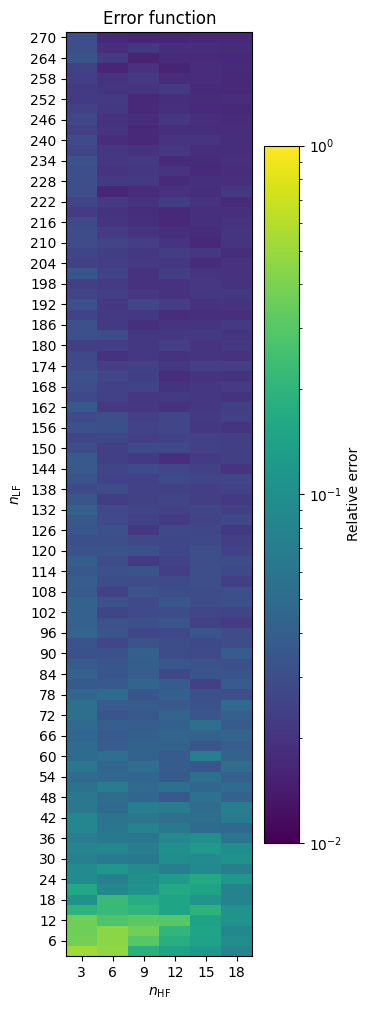

In [6]:
n_LF_max = 270
n_HF_max = 18
len_slice = 3

y = np.linspace(len_slice, n_LF_max, n_LF_max//len_slice)  # Replace with your desired range and resolution
x = np.linspace(len_slice, n_HF_max, n_HF_max//len_slice)  # Replace with your desired range and resolution
X, Y = np.meshgrid(x, y)

# create griddata
Z = grid_error(n_LF, n_HF, rel_error, len_slice=len_slice, n_LF_max=n_LF_max, n_HF_max=n_HF_max)

# Create a colormap to map function values to colors
cmap = plt.get_cmap('viridis')
vmin = 1e-2
vmax = 1

# Create a plot
plt.figure(figsize=(3, 12))
plt.pcolormesh(X, Y, Z, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(label='Relative error')
plt.title('Error function')
plt.xlabel(r'$n_\mathrm{HF}$')
plt.ylabel(r'$n_\mathrm{LF}$')
xticks = np.arange(3, n_HF_max + 1, 3)
plt.xticks(xticks)
y_ticks = np.arange(6, n_LF_max + 1, 6)
plt.yticks(y_ticks)
plt.show()


In [7]:
Z.shape

(90, 6)

In [19]:
X.shape

(90, 6)

In [9]:
pairs_done = []
for row in range(Z.shape[0]):
    for col in range(Z.shape[1]):
        if Z[row, col] != 1:
            pairs_done.append([3*(row+1), 3*(col+1)])
            

In [10]:
len(pairs_done)

540

In [11]:
pairs_done

[[3, 3],
 [3, 6],
 [3, 9],
 [3, 12],
 [3, 15],
 [3, 18],
 [6, 3],
 [6, 6],
 [6, 9],
 [6, 12],
 [6, 15],
 [6, 18],
 [9, 3],
 [9, 6],
 [9, 9],
 [9, 12],
 [9, 15],
 [9, 18],
 [12, 3],
 [12, 6],
 [12, 9],
 [12, 12],
 [12, 15],
 [12, 18],
 [15, 3],
 [15, 6],
 [15, 9],
 [15, 12],
 [15, 15],
 [15, 18],
 [18, 3],
 [18, 6],
 [18, 9],
 [18, 12],
 [18, 15],
 [18, 18],
 [21, 3],
 [21, 6],
 [21, 9],
 [21, 12],
 [21, 15],
 [21, 18],
 [24, 3],
 [24, 6],
 [24, 9],
 [24, 12],
 [24, 15],
 [24, 18],
 [27, 3],
 [27, 6],
 [27, 9],
 [27, 12],
 [27, 15],
 [27, 18],
 [30, 3],
 [30, 6],
 [30, 9],
 [30, 12],
 [30, 15],
 [30, 18],
 [33, 3],
 [33, 6],
 [33, 9],
 [33, 12],
 [33, 15],
 [33, 18],
 [36, 3],
 [36, 6],
 [36, 9],
 [36, 12],
 [36, 15],
 [36, 18],
 [39, 3],
 [39, 6],
 [39, 9],
 [39, 12],
 [39, 15],
 [39, 18],
 [42, 3],
 [42, 6],
 [42, 9],
 [42, 12],
 [42, 15],
 [42, 18],
 [45, 3],
 [45, 6],
 [45, 9],
 [45, 12],
 [45, 15],
 [45, 18],
 [48, 3],
 [48, 6],
 [48, 9],
 [48, 12],
 [48, 15],
 [48, 18],
 [51, 3],


In [12]:
def get_pairs_done(output_file):
    pairs_done = np.loadtxt(output_file, usecols=(0,1))
    return pairs_done

In [13]:
pairs_done = get_pairs_done('error_function.txt')

In [14]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [264.,   3.],
       [270.,   3.],
       [267.,   3.]])

In [15]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [264.,   3.],
       [270.,   3.],
       [267.,   3.]])

In [16]:
np.where(3 == pairs_done[:,0])

(array([305, 307, 310, 315, 321, 322, 540, 541, 546, 612, 983, 984]),)

In [20]:
Y

array([[  3.,   3.,   3.,   3.,   3.,   3.],
       [  6.,   6.,   6.,   6.,   6.,   6.],
       [  9.,   9.,   9.,   9.,   9.,   9.],
       [ 12.,  12.,  12.,  12.,  12.,  12.],
       [ 15.,  15.,  15.,  15.,  15.,  15.],
       [ 18.,  18.,  18.,  18.,  18.,  18.],
       [ 21.,  21.,  21.,  21.,  21.,  21.],
       [ 24.,  24.,  24.,  24.,  24.,  24.],
       [ 27.,  27.,  27.,  27.,  27.,  27.],
       [ 30.,  30.,  30.,  30.,  30.,  30.],
       [ 33.,  33.,  33.,  33.,  33.,  33.],
       [ 36.,  36.,  36.,  36.,  36.,  36.],
       [ 39.,  39.,  39.,  39.,  39.,  39.],
       [ 42.,  42.,  42.,  42.,  42.,  42.],
       [ 45.,  45.,  45.,  45.,  45.,  45.],
       [ 48.,  48.,  48.,  48.,  48.,  48.],
       [ 51.,  51.,  51.,  51.,  51.,  51.],
       [ 54.,  54.,  54.,  54.,  54.,  54.],
       [ 57.,  57.,  57.,  57.,  57.,  57.],
       [ 60.,  60.,  60.,  60.,  60.,  60.],
       [ 63.,  63.,  63.,  63.,  63.,  63.],
       [ 66.,  66.,  66.,  66.,  66.,  66.],
       [ 6

In [21]:
X

array([[ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 3.,  6.,  9., 12

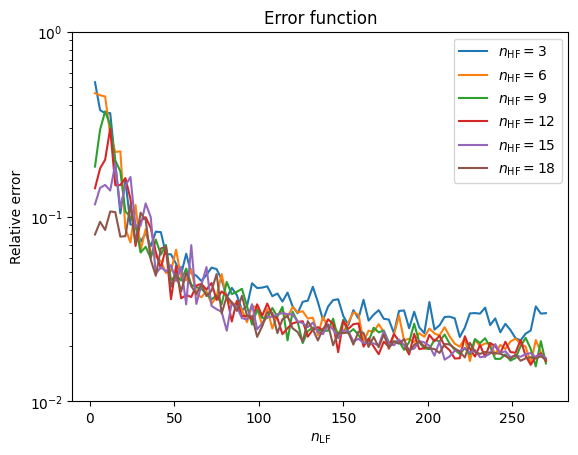

In [24]:
# plot the error function as curves
for i in range(len(X[0])):
    plt.plot(Y[:,0], Z[:, i], label=r'$n_\mathrm{HF}=$' + str(int(X[0, i])))
plt.legend()
plt.yscale('log')
plt.ylim(1e-2, 1)
plt.xlabel(r'$n_\mathrm{LF}$')
plt.ylabel('Relative error')
plt.title('Error function')
plt.show()